## Illustration of Bayesian learning of the mean of a normal distribution

This notebook illustrates the learning of the mean of a normal/Gaussian distribution using Bayes rule.  It merely implements the equations discussed in lectures.   After you've worked through the cells, experiment with changing the prior to see how that affects the learning.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Parameters of the true distribution

These are used to generate the data.  Of course, in a real situation we would not know these, but here we need to know them to generate the data.

In [1]:
mu = 2      # True mean
sigma = 3  # True standard deviation

# We assume that sigma is known and we are interested in estimating rhe posterior of only mean (mu)

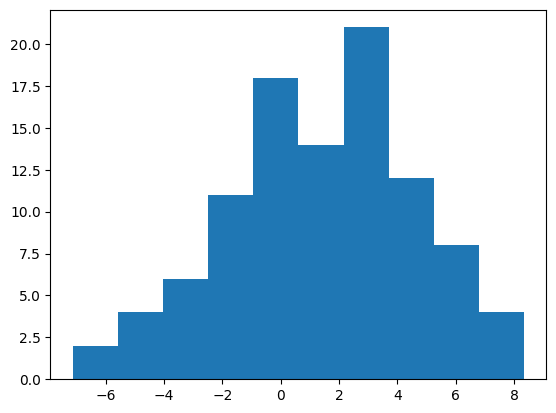

In [3]:
y = np.random.normal(mu,sigma,100)
plt.hist(y)
plt.show()

### Priors

The prior distribution for $\mu$ is a Gaussian itself, with mean $\mu_0$ and standard deviation $\sigma_0$

In [141]:
mu0 = 10
sigma0 = 3

Set up a grid of points at which to plot the probabilities and then plot the prior.  This prior says that we believe the most likely value of $\mu$ is $\mu_0 = 2$, but we are quite unsure (vague) about the actual value because the standard deviatio is $\sigma_0 = 2$ so we believe there is quite a high probability of the mean being between, say, $-1$ and $5$. 

In [142]:
mugrid = np.linspace(np.floor(mu-5*sigma), np.ceil(mu+5*sigma), 200);

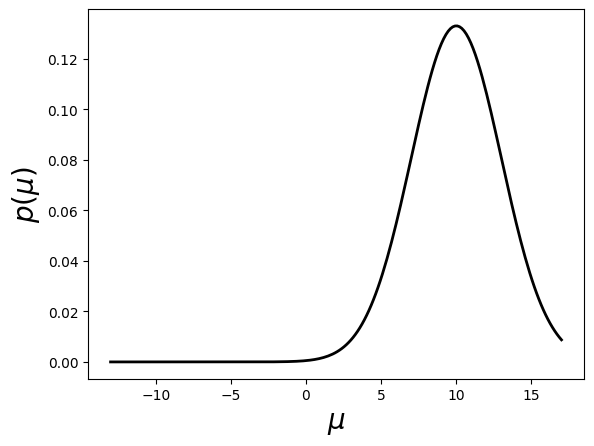

In [143]:
prior = np.exp(-(mugrid - mu0)**2/(2*sigma0**2))/np.sqrt(2*np.pi*sigma0**2); # this is the equation of a pdf of normal distribution
plt.plot(mugrid, prior, 'k', lw=2)
#title('Prior', size=20)
plt.xlabel(r'$\mu$', size=20)
plt.ylabel(r'$p(\mu)$', size=20)
plt.show()

Now Estimate the posterior using the closed form expression. 

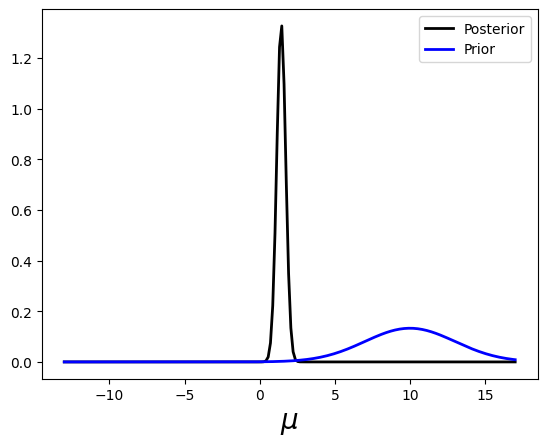

In [144]:
n = len(y)
sigman2 = 1.0/sigma0**2 + n/sigma**2
sigma_posterior = np.sqrt(1.0/sigman2)             # Posterior standard deviation

mu_posterior = (sigma_posterior**2)*(mu0/sigma0**2 + np.sum(y)/sigma**2)  #Posterior mean

posterior = np.exp(-(mugrid - mu_posterior)**2/(2*sigma_posterior**2))/np.sqrt(2*np.pi*sigma_posterior**2); # this is the equation of a pdf of normal distribution
plt.plot(mugrid, posterior, 'k', lw=2,label = 'Posterior')
plt.plot(mugrid, prior, 'b', lw=2, label = 'Prior')
plt.xlabel(r'$\mu$', size=20)
plt.legend()
plt.show()
#ylabel(r'$p(\mu)$', size=20)

In [48]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [53]:
import pandas as pd
data = pd.read_csv('Co2_data_set.csv')
data.head()

,# year,co2
0,1959.0,322.442265
1,1960.0,317.434331
2,1961.0,314.718562
3,1962.0,308.368942
4,1963.0,323.396974


In [52]:
data['# year']

0    1970-01-01 00:00:00.000001959
1    1970-01-01 00:00:00.000001960
2    1970-01-01 00:00:00.000001961
3    1970-01-01 00:00:00.000001962
4    1970-01-01 00:00:00.000001963
                  ...             
58   1970-01-01 00:00:00.000002017
59   1970-01-01 00:00:00.000002018
60   1970-01-01 00:00:00.000002019
61   1970-01-01 00:00:00.000002020
62   1970-01-01 00:00:00.000002021
Name: # year, Length: 63, dtype: datetime64[ns]

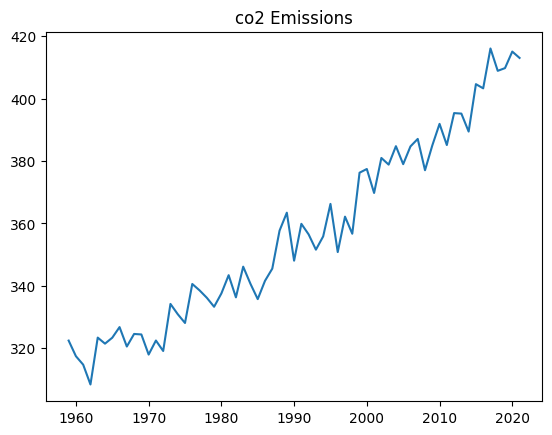

In [54]:
plt.plot(data['# year'],data['co2'])
plt.title('co2 Emissions')
plt.show()

In [185]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
xtrain,xtest,ytrain,ytest = train_test_split(data['# year'],data['co2'],test_size=0.2)
xtrains = xtrain.to_numpy().reshape(-1,1)
ytrains = ytrain.to_numpy()
kfold = KFold(n_splits=5,shuffle=True,random_state=103)
splits = kfold.split(xtrain,ytrain)
train_indexes_per_split = []
test_indexes_per_split = []
for n,(train_index,test_index) in enumerate(splits):
    train_indexes_per_split.append(train_index)
    test_indexes_per_split.append(test_index)

In [186]:
import warnings
warnings.filterwarnings('ignore')
MAE = []
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
kernel = ExpSineSquared(length_scale=3) + RBF(length_scale = 3) + WhiteKernel()
model = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=15,normalize_y=True).fit(xtrains,ytrains)
for i in range(5):
    model.fit(xtrains[train_indexes_per_split[i]],ytrains[train_indexes_per_split[i]])
    print('R2 value in cross val {0} is {1}'.format(i,r2_score(ytrains[test_indexes_per_split[i]],
    model.predict(xtrains[test_indexes_per_split[i]]))))
    MAE.append(mean_absolute_error(ytrains[test_indexes_per_split[i]],
    model.predict(xtrains[test_indexes_per_split[i]])))
plt.figure()
plt.title('MAE in five fold cross validation')
plt.plot([1,2,3,4,5],MAE)
plt.show()

ValueError: Unknown optimizer sgd.

In [182]:
xtests = xtest.to_numpy().reshape(-1,1)
ytests = ytest.to_numpy()

In [183]:
print('r2 score in test set is {0}'.format(r2_score(ytests,model.predict(xtests))))

r2 score in test set is 0.9138202151850096


In [164]:
MAE

[5.1237038039474445,
 4.844067958534476,
 4.497892531666372,
 5.895175578564164,
 4.401496101526874]

In [165]:
xtrain = data['# year']
ytrain = data['co2']
xtrains = xtrain.to_numpy().reshape(-1,1)
ytrains = data['co2'].to_numpy()


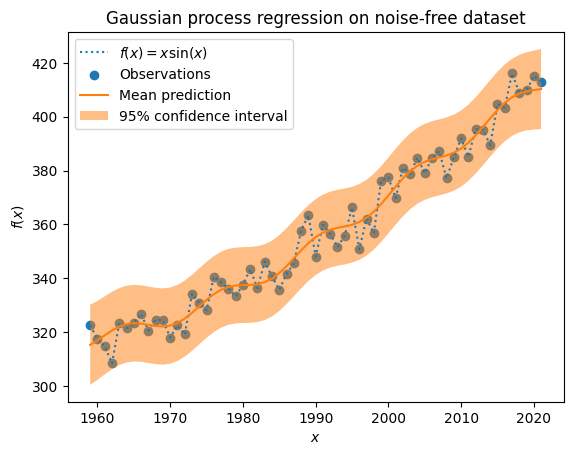

In [166]:
model.fit(xtrains,ytrains)
mean_prediction, std_prediction = model.predict(xtrains, return_std=True)
plt.plot(xtrains, ytrains, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(xtrains, ytrains, label="Observations")
plt.plot(xtrains, mean_prediction, label="Mean prediction")
plt.fill_between(
    xtrains.ravel(),
    mean_prediction - 2.58 * std_prediction,
    mean_prediction + 2.58 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

In [157]:
x = np.array(range(2022,2052,1))
future_data = x.reshape(-1,1)
future_data

array([[2022],
       [2023],
       [2024],
       [2025],
       [2026],
       [2027],
       [2028],
       [2029],
       [2030],
       [2031],
       [2032],
       [2033],
       [2034],
       [2035],
       [2036],
       [2037],
       [2038],
       [2039],
       [2040],
       [2041],
       [2042],
       [2043],
       [2044],
       [2045],
       [2046],
       [2047],
       [2048],
       [2049],
       [2050],
       [2051]])

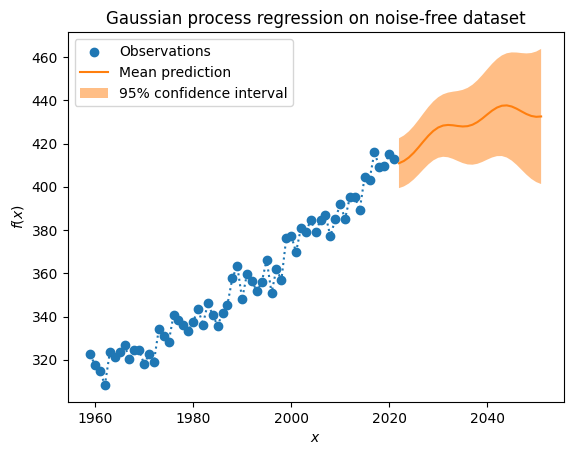

In [167]:
mean_prediction, std_prediction = model.predict(future_data, return_std=True)
plt.plot(xtrains, ytrains, linestyle="dotted")
plt.scatter(xtrains, ytrains, label="Observations")
plt.plot(future_data, mean_prediction, label="Mean prediction")
plt.fill_between(
    future_data.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")